In [1]:
from utils.EDA.analysis import *
from utils.EDA.visualize import *

In [2]:
%matplotlib inline

In [3]:
plt.style.use("ggplot")

### Read data

In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Overview of data

In [6]:
#df_train_info = df_train.info() # int : 35, float : 3, categorical : 43

In [7]:
df_train.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis the target

In [8]:
df_train_target_info = df_train["SalePrice"].describe()
df_train_target_info["skew"] = df_train["SalePrice"].skew()
df_train_target_info["kurto"] = df_train["SalePrice"].kurt()
df_train_target_info
# 평균 판매가격은 18만 달러, median : 16만 달러

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
skew          1.882876
kurto         6.536282
Name: SalePrice, dtype: float64

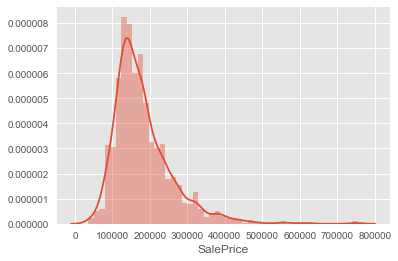

In [9]:
sns.distplot(df_train["SalePrice"], kde = True)

### Analysis the univariance

In [10]:
# split datas into quantative and categorical
list_quanToqual = ["MSSubClass", "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "MoSold", "YrSold"]

df_train_quan = extractQuanFromDF(df_train, 'Id', 'SalePrice', list_quanToqual)
df_train_qual = extractQualFromDF(df_train, include_list = list_quanToqual)

#### Quantiative data

##### non-graphical

In [ ]:
df_train_quan.describe()

##### graphical

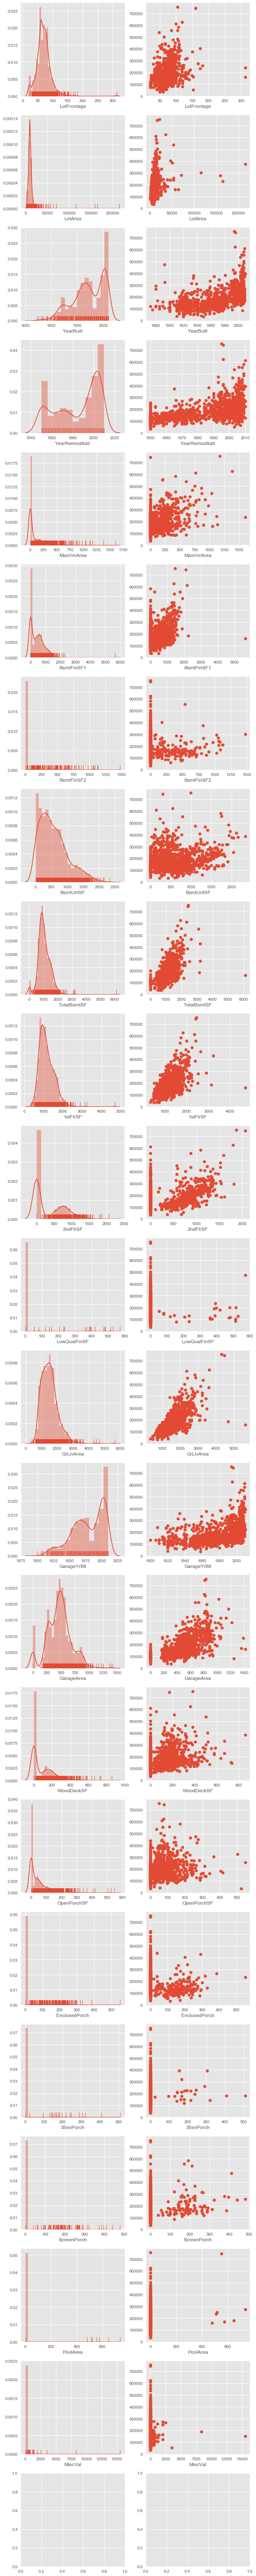

In [12]:
dispQuan(df_train_quan, df_train["SalePrice"])

#### Categorical

##### non-graphical

In [13]:
# 카테고리별 분포도 알아보기
get_ratio_categorical(df_train_qual, "TotRmsAbvGrd")

,count,ratio
6,402,27.534247
7,329,22.534247
5,275,18.835616
8,187,12.808219
4,97,6.643836
9,75,5.136986
10,47,3.219178
11,18,1.232877
3,17,1.164384
12,11,0.753425


In [14]:
# 각 카테고리의 가장 많은 값과 분포 알아보기
get_max_ratio_categorical(df_train_qual).tail()

,name,max_value,prop,total_num
53,Fireplaces,0,47.260274,1460
54,GarageCars,2,56.438356,1460
55,MoSold,6,17.328767,1460
56,YrSold,2009,23.150685,1460
57,count,1,100.000000,1460


##### graphical

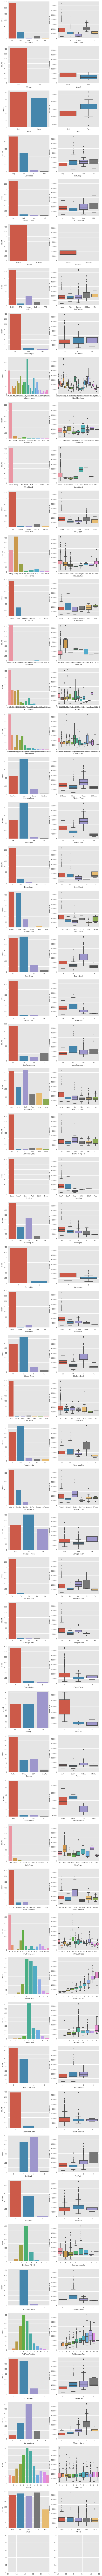

In [15]:
dispQual(df_train_qual, df_train["SalePrice"])

### Analysis the multi-variance

#### Correlation

##### graphical

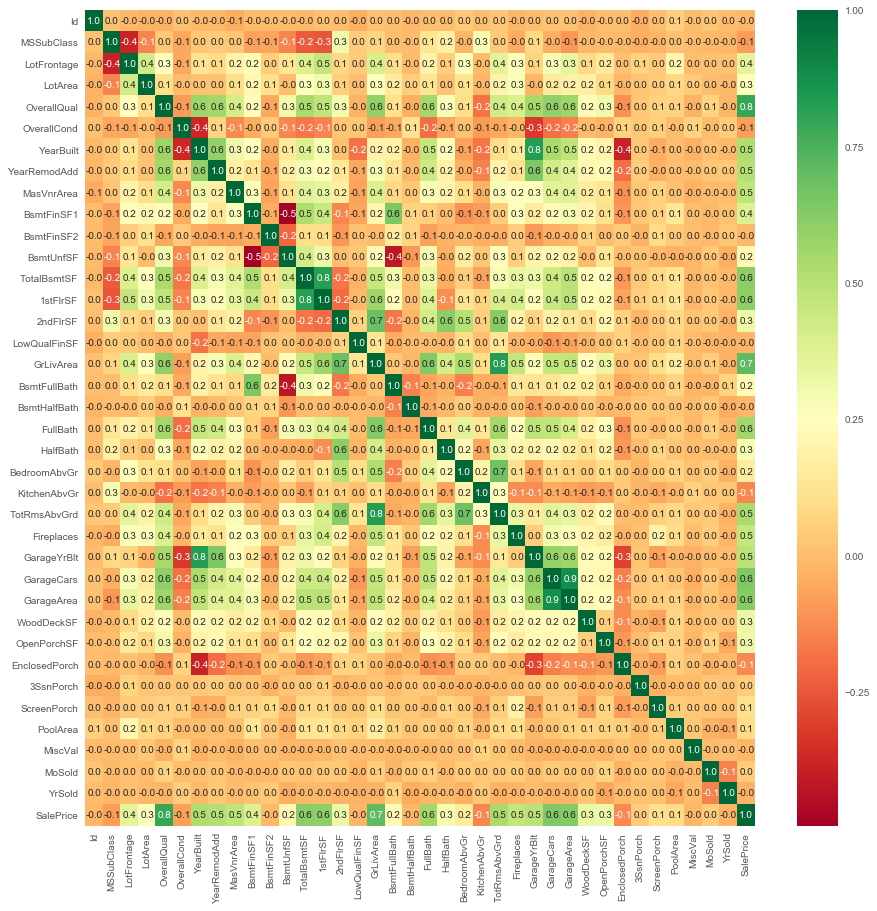

In [16]:
f, ax = plt.subplots(figsize = (15, 15))
data_cor = df_train.corr()
ax = sns.heatmap(data_cor, cmap = "RdYlGn", annot = True, fmt = "1.1f")

##### non-graphical

In [29]:
# SalePrice와 연관이 깊은 목록
get_top_abs_cor(df_train, 40, "OverallQual")

SalePrice        0.790982
GarageCars       0.600671
GrLivArea        0.593007
YearBuilt        0.572323
GarageArea       0.562022
YearRemodAdd     0.550684
FullBath         0.550600
GarageYrBlt      0.547766
TotalBsmtSF      0.537808
1stFlrSF         0.476224
TotRmsAbvGrd     0.427452
MasVnrArea       0.411876
Fireplaces       0.396765
OpenPorchSF      0.308819
BsmtUnfSF        0.308159
2ndFlrSF         0.295493
HalfBath         0.273458
LotFrontage      0.251646
BsmtFinSF1       0.239666
WoodDeckSF       0.238923
KitchenAbvGr     0.183882
EnclosedPorch    0.113937
BsmtFullBath     0.111098
LotArea          0.105806
BedroomAbvGr     0.101676
OverallCond      0.091932
MoSold           0.070815
PoolArea         0.065166
ScreenPorch      0.064886
BsmtFinSF2       0.059119
BsmtHalfBath     0.040150
MSSubClass       0.032628
MiscVal          0.031406
LowQualFinSF     0.030429
3SsnPorch        0.030371
Id               0.028365
YrSold           0.027347
Name: OverallQual, dtype: float64

In [28]:
# 전체 요소끼리 연관이 깊은 목록
get_top_abs_cor(df_train_quan, 10)

YearBuilt     GarageYrBlt     0.825667
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     SalePrice       0.708624
2ndFlrSF      GrLivArea       0.687501
YearRemodAdd  GarageYrBlt     0.642277
GarageArea    SalePrice       0.623431
TotalBsmtSF   SalePrice       0.613581
1stFlrSF      SalePrice       0.605852
YearBuilt     YearRemodAdd    0.592855
1stFlrSF      GrLivArea       0.566024
dtype: float64